<a href="https://colab.research.google.com/github/HamzahMadi4105/MachineLearning/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.svm import SVC
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
file_path = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [76]:
# List of variables to map

varlist =  ['diagnosis']

# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the housing list
dataset[varlist] = dataset[varlist].apply(binary_map)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [77]:
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values
dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Problem 1 a

In [78]:
def get_results(y_test, Y_pred):
    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred)
    rec = metrics.recall_score(y_test, Y_pred)
    fscore = metrics.f1_score(y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))
    print("Precision:",metrics.precision_score(y_test, Y_pred))
    print("Recall:",metrics.recall_score(y_test, Y_pred))
    print("F1-Score:",metrics.f1_score(y_test, Y_pred))
    return [acc*100.0, pre*100.0, rec*100.0, fscore*100.0]


def logist_model_training_pca(X, Y):
    n=X.shape[1]
    acc_list=[]
    recall_list=[]
    precision_list=[]
    f1score_list = []
    k_list=[]
    for i in range(n):
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        #classifier = LogisticRegression(penalty='l2', C=1, solver = 'lbfgs')
        classifier = LogisticRegression(random_state=9)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        re = get_results(y_test, Y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k=acc_list.index(max(acc_list))+1
    print("----------------")
    print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list



In [79]:
sc_X = StandardScaler()
cancerset = pd.DataFrame(X)
X = sc_X.fit_transform(cancerset)

In [80]:
k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

K = 1
Accuracy: 0.9298245614035088
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1-Score: 0.8888888888888888
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9393939393939394
Recall: 0.8611111111111112
F1-Score: 0.8985507246376813
K = 3
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score: 0.9444444444444444
K = 4
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9722222222222222
F1-Score: 0.9859154929577464
K = 5
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
K = 6
Accuracy: 0.9912280701754386
Precision: 0.972972972972973
Recall: 1.0
F1-Score: 0.9863013698630138
K = 7
Accuracy: 0.9912280701754386
Precision: 0.972972972972973
Recall: 1.0
F1-Score: 0.9863013698630138
K = 8
Accuracy: 0.9824561403508771
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1-Score: 0.9722222222222222
K = 9
Accuracy: 0.9912280701754386
Precision: 0.972972972972973
Recall: 1.0
F1-Score: 0.9863013698630138
K = 10
Accuracy: 0.982456140350877

In [81]:
def plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list):
    plt.plot(k_list, acc_list, label = "Accuracy")
    plt.plot(k_list, precision_list, label = "Precision")
    plt.plot(k_list, recall_list, label = "Recall")
    plt.plot(k_list, f1score_list, label = "F1-Score")
    plt.legend()
    plt.title('Kernel Model')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

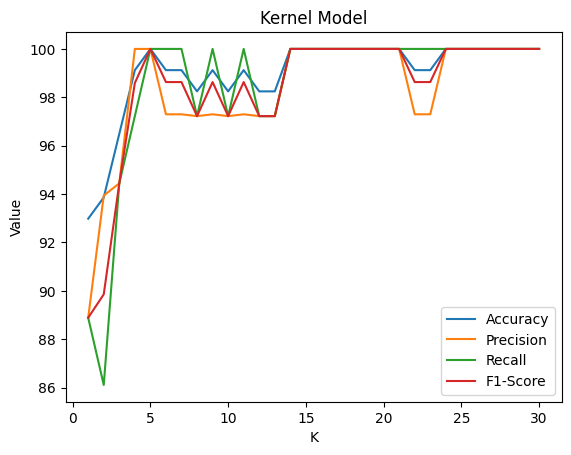

In [82]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

In [83]:
modellinear = SVC(kernel='linear', C=1E2)
modelrbf = SVC(kernel='rbf', C=1E2)
modelpoly =SVC(kernel='poly', C=1E2)
modelsigmoid =SVC(kernel='sigmoid', C=1E2)
modelprecomputed =SVC(kernel='precomputed', C=1E2)  #rbf: radial basis function
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
modellinear.fit(X, Y)

SVC(C=100.0, kernel='linear')

In [84]:
def get_results(y_test, Y_pred):
    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred)
    rec = metrics.recall_score(y_test, Y_pred)
    fscore = metrics.f1_score(y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))
    print("Precision:",metrics.precision_score(y_test, Y_pred))
    print("Recall:",metrics.recall_score(y_test, Y_pred))
    print("F1-Score:",metrics.f1_score(y_test, Y_pred))
    return [acc*100.0, pre*100.0, rec*100.0, fscore*100.0]


def logist_model_training_pca(X, Y):
    n=X.shape[1]
    acc_list=[]
    recall_list=[]
    precision_list=[]
    f1score_list = []
    k_list=[]
    for i in range(n):
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        #classifier = LogisticRegression(penalty='l2', C=1, solver = 'lbfgs')
        classifier = modelpoly
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        re = get_results(y_test, Y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k=acc_list.index(max(acc_list))+1
    print("----------------")
    print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list

In [85]:
k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

K = 1
Accuracy: 0.9210526315789473
Precision: 0.9655172413793104
Recall: 0.7777777777777778
F1-Score: 0.8615384615384615
K = 2
Accuracy: 0.9298245614035088
Precision: 0.9666666666666667
Recall: 0.8055555555555556
F1-Score: 0.8787878787878789
K = 3
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score: 0.9444444444444444
K = 4
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9444444444444444
F1-Score: 0.9714285714285714
K = 5
Accuracy: 0.9649122807017544
Precision: 0.9705882352941176
Recall: 0.9166666666666666
F1-Score: 0.9428571428571428
K = 6
Accuracy: 0.9649122807017544
Precision: 0.9705882352941176
Recall: 0.9166666666666666
F1-Score: 0.9428571428571428
K = 7
Accuracy: 0.9473684210526315
Precision: 0.9411764705882353
Recall: 0.8888888888888888
F1-Score: 0.9142857142857143
K = 8
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score: 0.9444444444444444
K = 9
Accuracy: 0.9824561403508771
Precision: 0

Poly

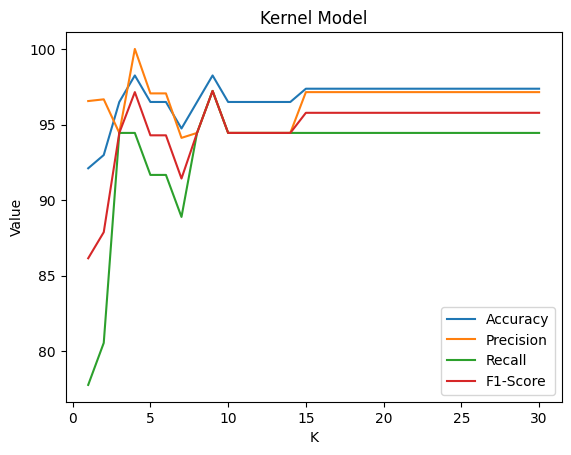

In [86]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

In [87]:
def logist_model_training_pca(X, Y):
    n=X.shape[1]
    acc_list=[]
    recall_list=[]
    precision_list=[]
    f1score_list = []
    k_list=[]
    for i in range(n):
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        #classifier = LogisticRegression(penalty='l2', C=1, solver = 'lbfgs')
        classifier = modelrbf
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        re = get_results(y_test, Y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k=acc_list.index(max(acc_list))+1
    print("----------------")
    print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list
k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

K = 1
Accuracy: 0.9298245614035088
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1-Score: 0.8888888888888888
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9142857142857143
Recall: 0.8888888888888888
F1-Score: 0.9014084507042254
K = 3
Accuracy: 0.9385964912280702
Precision: 0.9142857142857143
Recall: 0.8888888888888888
F1-Score: 0.9014084507042254
K = 4
Accuracy: 0.956140350877193
Precision: 0.9428571428571428
Recall: 0.9166666666666666
F1-Score: 0.9295774647887323
K = 5
Accuracy: 0.956140350877193
Precision: 0.918918918918919
Recall: 0.9444444444444444
F1-Score: 0.9315068493150684
K = 6
Accuracy: 0.9736842105263158
Precision: 0.9714285714285714
Recall: 0.9444444444444444
F1-Score: 0.9577464788732395
K = 7
Accuracy: 0.956140350877193
Precision: 0.918918918918919
Recall: 0.9444444444444444
F1-Score: 0.9315068493150684
K = 8
Accuracy: 0.9385964912280702
Precision: 0.8918918918918919
Recall: 0.9166666666666666
F1-Score: 0.9041095890410958
K = 9
Accuracy: 0.9736842105263158
Pr

Rbf

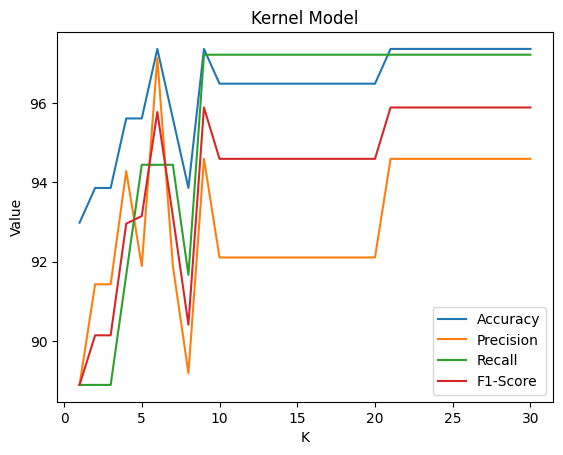

In [88]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

In [89]:
def logist_model_training_pca(X, Y):
    n=X.shape[1]
    acc_list=[]
    recall_list=[]
    precision_list=[]
    f1score_list = []
    k_list=[]
    for i in range(n):
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        #classifier = LogisticRegression(penalty='l2', C=1, solver = 'lbfgs')
        classifier = modelsigmoid
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        re = get_results(y_test, Y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k=acc_list.index(max(acc_list))+1
    print("----------------")
    print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list
k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

K = 1
Accuracy: 0.8771929824561403
Precision: 0.7894736842105263
Recall: 0.8333333333333334
F1-Score: 0.8108108108108109
K = 2
Accuracy: 0.8508771929824561
Precision: 0.7111111111111111
Recall: 0.8888888888888888
F1-Score: 0.7901234567901234
K = 3
Accuracy: 0.868421052631579
Precision: 0.7441860465116279
Recall: 0.8888888888888888
F1-Score: 0.8101265822784809
K = 4
Accuracy: 0.9035087719298246
Precision: 0.8205128205128205
Recall: 0.8888888888888888
F1-Score: 0.8533333333333333
K = 5
Accuracy: 0.9298245614035088
Precision: 0.85
Recall: 0.9444444444444444
F1-Score: 0.8947368421052632
K = 6
Accuracy: 0.8947368421052632
Precision: 0.8
Recall: 0.8888888888888888
F1-Score: 0.8421052631578948
K = 7
Accuracy: 0.9122807017543859
Precision: 0.8095238095238095
Recall: 0.9444444444444444
F1-Score: 0.8717948717948718
K = 8
Accuracy: 0.9210526315789473
Precision: 0.8461538461538461
Recall: 0.9166666666666666
F1-Score: 0.8799999999999999
K = 9
Accuracy: 0.9122807017543859
Precision: 0.84210526315789

Sigmoid

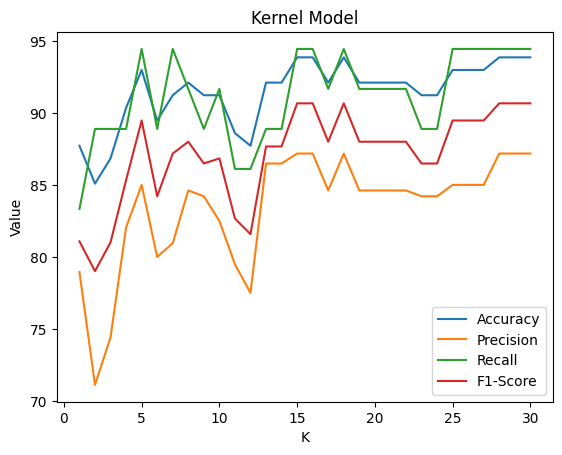

In [90]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

In [91]:
def logist_model_training_pca(X, Y):
    n=X.shape[1]
    acc_list=[]
    recall_list=[]
    precision_list=[]
    f1score_list = []
    k_list=[]
    for i in range(n):
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        #classifier = LogisticRegression(penalty='l2', C=1, solver = 'lbfgs')
        classifier = modellinear
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        re = get_results(y_test, Y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k=acc_list.index(max(acc_list))+1
    print("----------------")
    print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list
k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

K = 1
Accuracy: 0.9298245614035088
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1-Score: 0.8888888888888888
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9393939393939394
Recall: 0.8611111111111112
F1-Score: 0.8985507246376813
K = 3
Accuracy: 0.956140350877193
Precision: 0.9428571428571428
Recall: 0.9166666666666666
F1-Score: 0.9295774647887323
K = 4
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9444444444444444
F1-Score: 0.9714285714285714
K = 5
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score: 0.9444444444444444
K = 6
Accuracy: 0.9824561403508771
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1-Score: 0.9722222222222222
K = 7
Accuracy: 0.9824561403508771
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1-Score: 0.9722222222222222
K = 8
Accuracy: 0.9736842105263158
Precision: 0.9459459459459459
Recall: 0.9722222222222222
F1-Score: 0.9589041095890412
K = 9
Accuracy: 0.9824561403508771
Precision: 0.

Linear

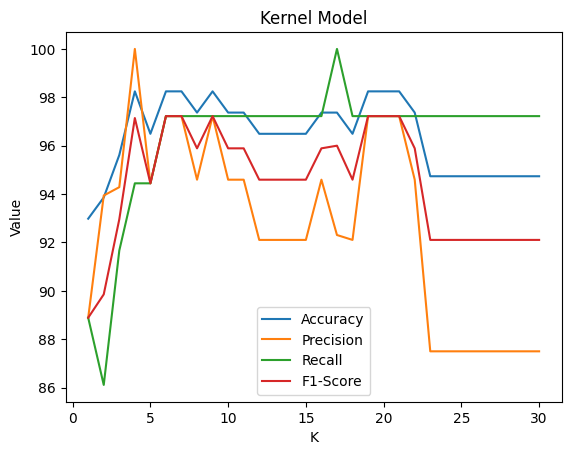

In [92]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)